In [1]:
import re
import csv  
import time
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from selenium import webdriver
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

# Data Cleaning

In [45]:
#df is from 0 to 18778.5
#df2 is from 18779 to 37000
#df3 fuck it
df = pd.read_csv('final_Data.csv', encoding='latin1')
df2 = pd.read_csv('final_Data2.csv', encoding='latin1')
df3 = pd.read_csv('final_Data3.csv', encoding='latin1')
df4 = pd.read_csv('final_Data4.csv', encoding='latin1')
df2

,Name,Review,Date,Dev name,Tags
0,Box Maze 2 : Agent Cubert,Positive,"Jan 5, 2018",NaN,"['Casual', 'Action', 'Adventure', 'Indie', 'St..."
1,catAnod,Positive,"Apr 23, 2018",NaN,"['Indie', '2D', 'Puzzle', 'Singleplayer', 'Min..."
2,Escape: Close Call,Positive,"Mar 24, 2016",NaN,"['Action', 'Indie', 'Casual']"
3,Mortal Kombat 11 Gothic Horror Skin Pack,Positive,"Dec 3, 2019",NaN,"['Action', 'Gore', 'Violent']"
4,Last Encounter,Positive,"May 8, 2018",NaN,"['Action Roguelike', 'Action', 'Indie', 'Rogue..."
...,...,...,...,...,...
17874,Tom Clancy's Ghost Recon® Wildlands - Narco Road,NaN,"Apr 25, 2017",NaN,"['Action', 'Adventure']"
17875,Command & Conquer 4: Tiberian Twilight,NaN,"Mar 16, 2010",NaN,"['Strategy', 'RTS', 'Multiplayer', 'Sci-fi', '..."
17876,Sid Meier's Civilization® VI: Vikings Scenario...,NaN,"Dec 20, 2016",NaN,['Strategy']
17877,XIII,NaN,"Nov 10, 2020",NaN,"['FPS', 'Shooter', 'Stealth', 'PvP', 'Action',..."


In [3]:
print('Percentage of nan values', df['Review'].isna().sum()/len(df['Review'])*100)

Percentage of nan values 15.065514054259774


In [4]:
concatDF = pd.concat([df2, df4], ignore_index=True)
concatDFfinal = pd.concat([df, concatDF], ignore_index=True)
concatDFfinal
concatDFfinal.dropna(subset=['Review', 'Tags'], inplace = True)
concatDFfinal.reset_index(drop=True, inplace = True)
concatDFfinal

,Name,Review,Date,Dev name,Tags
0,The Henry Stickmin Collection,Overwhelmingly Positive,"Aug 7, 2020",NaN,"['Funny', 'Choose Your Own Adventure', 'Multip..."
1,ULTRAKILL,Overwhelmingly Positive,"Sep 3, 2020",NaN,"['Early Access', 'FPS', 'Spectacle fighter', '..."
2,A Short Hike,Overwhelmingly Positive,"Jul 30, 2019",NaN,"['Adventure', 'Exploration', 'Indie', 'Cute', ..."
3,Aseprite,Overwhelmingly Positive,"Feb 22, 2016",NaN,"['Pixel Graphics', 'Design & Illustration', 'A..."
4,Cube Escape Collection,Overwhelmingly Positive,"Oct 14, 2020",NaN,"['Adventure', 'Mystery', 'Puzzle', 'Indie', 'P..."
...,...,...,...,...,...
30520,Tom Clancy's Ghost Recon® Wildlands - Narco Road,Mostly Negative,"Apr 25, 2017",NaN,"['Action', 'Adventure']"
30521,Command & Conquer 4: Tiberian Twilight,Mostly Negative,"Mar 16, 2010",NaN,"['Strategy', 'RTS', 'Multiplayer', 'Sci-fi', '..."
30522,Sid Meier's Civilization® VI: Vikings Scenario...,Mostly Negative,"Dec 20, 2016",NaN,['Strategy']
30523,XIII,Mostly Negative,"Nov 10, 2020",NaN,"['FPS', 'Shooter', 'Stealth', 'PvP', 'Action',..."


In [5]:
concatDFfinal['Review'].value_counts()

Very Positive              8588
 Mostly Negative           8338
Positive                   7591
Mostly Positive            5641
Overwhelmingly Positive     367
Name: Review, dtype: int64

In [6]:
#Data cleaning
concatDFfinal.drop(['Dev name'], axis=1, inplace=True)
df2['Review'].value_counts()

Very Positive              8137
Positive                   6792
Overwhelmingly Positive     367
Mostly Positive             326
Name: Review, dtype: int64

<AxesSubplot:>

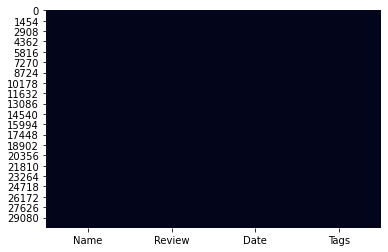

In [49]:
sns.heatmap(concatDFfinal.isnull(), cbar=False)

<AxesSubplot:>

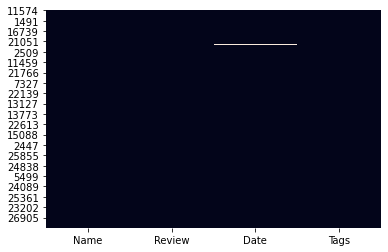

In [8]:
dfSample = concatDFfinal.sample(frac=0.50)
sns.heatmap(dfSample.isnull(), cbar=False)

In [9]:
df = dfSample
df

,Name,Review,Date,Tags
11574,Guardian's Oath,Positive,"Sep 28, 2016","['Action', 'Indie', 'RPG']"
1945,Easy Pose,Very Positive,"Jun 4, 2020","['Utilities', 'Character Customization', 'Earl..."
5052,Ultrawings,Very Positive,"Jul 20, 2017","['Simulation', 'Adventure', 'VR', 'Flight', 'O..."
4367,Mashinky,Very Positive,"Oct 6, 2018","['Early Access', 'Strategy', 'Simulation', 'Tr..."
29259,THORNYWAY,Mostly Negative,"Sep 11, 2017","['Action', 'Indie', 'Difficult']"
...,...,...,...,...
27021,Wildlife Park 2 - Fantasy,Mostly Negative,"Nov 15, 2013","['Simulation', 'Casual', 'Indie', 'Strategy', ..."
19346,WTCC 2010  Expansion Pack for RACE 07,Mostly Positive,"May 20, 2011","['Racing', 'Simulation']"
13362,DREAMO - Puzzle Adventure,Positive,"Feb 20, 2020","['Casual', 'Adventure', 'Puzzle', 'Colorful', ..."
7378,Someday You'll Return,Mostly Positive,"May 5, 2020","['Adventure', 'Indie', 'Horror', 'Gore', 'Viol..."


In [10]:
def Convert(string): 
    try:
        #print(type(string))
        #print(string)
        li = list(string.replace("'", "").replace('[','').replace(']','').split(","))
        return li
    except Exception as e:
        #print(e)
        pass

In [11]:
def uniqueValues(df):
    uniqueList = []
    for i in range(len(df)):
        #print(df['Tags'][i])
        try:
            for j in Convert(df['Tags'][i]):
                if j not in uniqueList:
                    uniqueList.append(j)
        except:
            pass
            
    return uniqueList

In [12]:
def fillTags(originalDF, zeroDF):
    for i in range(len(originalDF)):
        try:
            tagList = Convert(originalDF['Tags'][i]) 
            for j in tagList:
                rowIndex = zeroDF.index[i]
                zeroDF.loc[rowIndex, j] = 1
        except:
            pass

In [13]:
def mergeDF(df, d):    
    finalDF = pd.merge(df, d, left_index=True, right_index=True)
    finalDF.drop(['Tags', 'Date', 'Name'], axis = 1, inplace = True)
    finalDF = finalDF[finalDF['Review'].notna()]
    finalDF.reset_index(drop=True, inplace = True)
    return finalDF

In [14]:
#removing the wanted amount of columns
def removeCol(d, nbsColRemove):
    #This takes the smallest nbsColRemove amount columns from d
    smallest = d.sum(axis = 0, skipna = True).nsmallest(nbsColRemove)
    #print(smallest)
    #This takes the biggest value in that above series
    lessThan = d.sum(axis = 0, skipna = True).nsmallest(nbsColRemove)[nbsColRemove-1]
    #print(lessThan)
    d_without_small = pd.DataFrame()
    for i in range(nbsColRemove):
        #Grab each column in that first series
        col = smallest[smallest < lessThan + 1].index[i]
        #And drop it
        d.drop(columns=[col], axis = 1, inplace = True)

I have performed grid search below and determined that the best inputs were C=1, gamma = 0.1 and kernel=rbf

# Data analysis

# Support Vector



In [17]:
def testSVCPrecision():
    #variables to store our final info
    bestPrecision = 0
    colRemoved = 0;
    #gets all the different column names
    differentTags = uniqueValues(df)
    #creates new df
    d = pd.DataFrame(0, index=np.arange(len(df)), columns=differentTags)
    #fills our empty df with all columns with 0 if tags exist or 0
    fillTags(df, d)
    for i in range(1, len(d)-1):
    #try:  
        d_copy = d.copy()
        #Remove i smallest column
        removeCol(d_copy, i)
        #merge the two df
        finalDF = mergeDF(df, d_copy)
        #Creates our X and y for training
        X = finalDF.drop('Review',axis=1)
        y = finalDF['Review']   
        #split 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
        model = SVC(C=1, gamma = 0.1)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision=score(y_test,predictions,average='macro')
        if((precision[0] >= bestPrecision)):
            bestPrecision = precision[0]
            colRemoved = i
        print(precision, ' ', i)
    #except:
        #pass
    print('test')
    print('Best precision:', bestPrecision, 'numbers of column removed:', colRemoved)


In [18]:
#testSVCPrecision()

In [47]:
#Best precision: 0.5016959605303731 numbers of column removed: 155
differentTags = uniqueValues(df)
d = pd.DataFrame(0, index=np.arange(len(df)), columns=differentTags)
fillTags(df, d)
removeCol(d, 155)
finalDF = mergeDF(df, d)
print(len(finalDF))

15622


In [40]:
#Creates our X and y for training
X = finalDF.drop('Review',axis=1)
y = finalDF['Review']   
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
model = SVC(C=1, gamma = 0.1, class_weight = "balanced")
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

        Mostly Positive       0.12      0.02      0.03        51
Overwhelmingly Positive       0.18      0.03      0.05        62
               Positive       0.66      0.72      0.69      1002
          Very Positive       0.67      0.68      0.67      1169

               accuracy                           0.66      2284
              macro avg       0.41      0.36      0.36      2284
           weighted avg       0.64      0.66      0.65      2284



# Parameter tweeking
# # Grid Seach

I have performed grid search and defined that {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} were the best input

In [19]:
#Grid search
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)


In [20]:
#grid.fit(X_train,y_train)

In [21]:
#grid.best_params_

In [22]:
#grid_predictions = grid.predict(X_test)

In [23]:
#print(confusion_matrix(y_test,grid_predictions))

In [24]:
#print(classification_report(y_test,grid_predictions))

# Decision trees

In [25]:
differentTags = uniqueValues(df)
d = pd.DataFrame(0, index=np.arange(len(df)), columns=differentTags)
fillTags(df, d)
d
removeCol(d, 334)
finalDF = mergeDF(df, d)
finalDF

,Review,Choose Your Own Adventure,Multiple Endings,Memes,Classic,Comedy,Singleplayer,Choices Matter,Point & Click,2D,...,+,Political Sim,Martial Arts,Spectacle fighter,Design & Illustration,Solitaire,Conspiracy,MMORPG,Software Training,Massively Multiplayer
0,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Very Positive,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Very Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Very Positive,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Positive,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,Very Positive,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7608,Overwhelmingly Positive,1,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7609,Positive,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,Mostly Positive,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Decision Tree and Random Forest

In [26]:
def testDecisionTreePrecision():
    #variables to store our final info
    bestPrecision = 0
    colRemoved = 0
    bestPrecision2 = 0
    colRemoved2 = 0;
    #gets all the different column names
    differentTags = uniqueValues(df)
    #creates new df
    d = pd.DataFrame(0, index=np.arange(len(df)), columns=differentTags)
    #fills our empty df with all columns with 0 if tags exist or 0
    fillTags(df, d)
    for i in range(1, len(d)-1):
    #try:  
        d_copy = d.copy()
        #Remove i smallest column
        removeCol(d_copy, i)
        #merge the two df
        finalDF = mergeDF(df, d_copy)
        #Creates our X and y for training
        X = finalDF.drop('Review',axis=1)
        y = finalDF['Review']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
        dtree = DecisionTreeClassifier()
        dtree.fit(X_train,y_train)
        predictions = dtree.predict(X_test)
        precision=score(y_test,predictions,average='macro')

        if((precision[0] >= bestPrecision)):
            bestPrecision = precision[0]
            colRemoved = i

        rfc = RandomForestClassifier(n_estimators=600)
        rfc.fit(X_train,y_train)
        predictions2 = rfc.predict(X_test)
        precision2=score(y_test,predictions2,average='macro')


        if((precision2[0] >= bestPrecision2)):
            bestPrecision2 = precision2[0]
            colRemoved2 = i

        print('precision2', precision[0], ' ', i)
        print('precision2', precision2[0], ' ', i)
    #except:
        #pass
    print('Best precision:', bestPrecision, 'numbers of column removed:', colRemoved)
    print('Best precision:', bestPrecision2, 'numbers of column removed:', colRemoved2)

    #Best precision: 0.0.3595797827003404 numbers of column removed: 198

In [27]:
#testDecisionTreePrecision()

In [46]:
differentTags = uniqueValues(df)
d = pd.DataFrame(0, index=np.arange(len(df)), columns=differentTags)
fillTags(df, d)
removeCol(d, 198)
finalDF = mergeDF(df, d)

In [44]:
X = finalDF.drop('Review',axis=1)
y = finalDF['Review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier(class_weight = 'balanced')
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

        Mostly Positive       0.03      0.04      0.03        51
Overwhelmingly Positive       0.11      0.11      0.11        62
               Positive       0.60      0.63      0.62      1002
          Very Positive       0.62      0.59      0.61      1169

               accuracy                           0.58      2284
              macro avg       0.34      0.34      0.34      2284
           weighted avg       0.59      0.58      0.58      2284



                         precision    recall  f1-score   support

        Mostly Positive       0.00      0.00      0.00         1
Overwhelmingly Positive       0.48      0.38      0.42        93
          Very Positive       0.79      0.84      0.82       258

               accuracy                           0.72       352
              macro avg       0.42      0.41      0.41       352
           weighted avg       0.71      0.72      0.71       352